# Long Format and Wide Format

General Rules of Thumb with Tabular Data:
- It is easier to describe functional relationships between **variables/columns** (e.g., z is a linear combination
  of x and y, density is the ratio of weight to volume) than between rows, and it is easier
  to make comparisons between groups of **observations/rows** (e.g., average of group a vs. average of
  group b) than between groups of columns.
- Depending on your use case, you might want to represent some information as individual rows of a single column (long format), or represent that same information across multiple, separate columns (wide format).
- Long Format is generally better for visualizing statistics (e.g. matplotlib seaborn), whereas Wide Format generally lends itself better for machine learning.
- You'll usually know in which format you want your data to look, so it becomes more an exercise of how to actually implement it.

In [65]:
import pandas as pd

In [66]:
df = pd.read_csv('penguins_simple.csv', sep=';')
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


In [67]:
#What is the average Mass (g) of the penguins, grouped by Sex and Species?

In [68]:
avgs = df.groupby(['Species', 'Sex'])['Body Mass (g)'].mean()
#We get back a Series (so one column of data) with a STACKED / NESTED Index (Species and Sex)

In [69]:
avgs

Species    Sex   
Adelie     FEMALE    3368.835616
           MALE      4043.493151
Chinstrap  FEMALE    3527.205882
           MALE      3938.970588
Gentoo     FEMALE    4679.741379
           MALE      5484.836066
Name: Body Mass (g), dtype: float64

In [70]:
pivoted = avgs.unstack(1) 
#this is called unstacking, or pivoting
#now we have a DataFrame, because we now we have a "Wide" table with multiple columns
#we reshaped a (6, 1) -> (2, 3)

<AxesSubplot:xlabel='Species'>

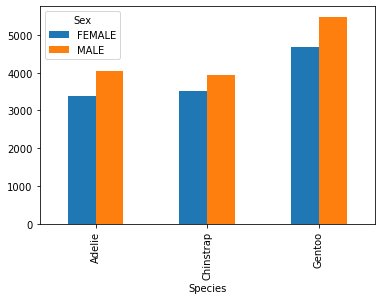

In [71]:
pivoted.plot.bar()

Common patters in coding:
- ``empty list`` + ``for-loop`` + ``.append()``
- ``.groupby(['col1', 'col2', ...])``  + ``.unstack()``
- ``.set_index()`` + ``.stack()``

In [36]:
pivoted.stack().reset_index()
#the reverse operation is stacking or "melting". Wide -> Long

,Species,Sex,0
0,Adelie,FEMALE,3368.835616
1,Adelie,MALE,4043.493151
2,Chinstrap,FEMALE,3527.205882
3,Chinstrap,MALE,3938.970588
4,Gentoo,FEMALE,4679.741379
5,Gentoo,MALE,5484.836066


An example of a triple-nested Index to unstack in various ways:

In [72]:
df['region'] = ['Region A'] * 100 + ['Region B'] * 100 + ['Region C'] * 133 #create new dummy categorical column

In [73]:
triple_stacked = df.groupby(['Species', 'Sex', 'region'])['Body Mass (g)'].mean()

In [74]:
triple_stacked.unstack((0, 2))
#we can unstack multiple things

Species   Adelie                Chinstrap                    Gentoo
region  Region A    Region B     Region B     Region C     Region C
Sex                                                                
FEMALE    3379.0  3346.73913  3530.555556  3514.285714  4679.741379
MALE      4076.5  3971.73913  3955.555556  3875.000000  5484.836066

---

Example taken from **Tidy Data (Journal of Statistical Software)** (see course material)

In [75]:
import numpy as np

In [76]:
data = [['John Smith', np.nan, 2], ['Jane Doe', 16.0, 11.0], ['Mary Johnson', 3.0, 1.0]]
columns=['person', 'treatment_a', 'treatment_b']
untidy = pd.DataFrame(columns=columns, data=data)

In [77]:
untidy.head()


,person,treatment_a,treatment_b
0,John Smith,NaN,2.0
1,Jane Doe,16.0,11.0
2,Mary Johnson,3.0,1.0


In [58]:
untidy.set_index('person').stack(dropna=False).reset_index()
#Now considered "tidy", because:
#each row represents an observation (the result of one treatment on one person), and
#each column is a variable.

,person,level_1,0
0,John Smith,treatment_a,NaN
1,John Smith,treatment_b,2.0
2,Jane Doe,treatment_a,16.0
3,Jane Doe,treatment_b,11.0
4,Mary Johnson,treatment_a,3.0
5,Mary Johnson,treatment_b,1.0


In [62]:
pd.melt(untidy, id_vars='person', var_name='treatment_type', value_name='result')
#Convenience function for achieving the same thing.

,person,treatment_type,result
0,John Smith,treatment_a,NaN
1,Jane Doe,treatment_a,16.0
2,Mary Johnson,treatment_a,3.0
3,John Smith,treatment_b,2.0
4,Jane Doe,treatment_b,11.0
5,Mary Johnson,treatment_b,1.0


In summary, we have 2 configurations of tables:
- Long Format:
    - to get a table into long format, use:
        - ``stack`` or ``melt``
    - In general, lends itself better for plotting statistics
- Wide Format:
    - to get a table into wide format, use:
        - ``unstack`` or ``pivot``
    - In general, lends itself better for machine learning
    
Also:

"Tidy data is particularly well suited for programming languages like R and Python, because the layout **ensures that values of different variables from the same observation are always paired.**" -Hadley Wickham, *Tidy Data*

---

More practical example of "untidy" data in a very wide format:
- Your job is to melt this data into a longer format so that it's easier to work with and merge with other tables in the Animated Scatterplot Exercise in the course material. https://krspiced.pythonanywhere.com/chapters/project_gapminder/long_vs_wide.html#animated-scatterplot-exercise

In [78]:
pd.read_excel('/Users/pawlodkowski/Downloads/gapminder_population.xlsx').head()

,Total population,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
4,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0
